In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
raw_data = pd.read_csv('data.csv')
raw_data

Benchmark  GPU1  GPU2  GPU3  GPU4
0        bs  2273   277    50    72
1        km  3064   990   967  1182
2       bfs     4     1     1     1
3       fir  2200   126    11   256
4       flw  2442    95    29     9
5        mt  6247   512   640   613
6        pr     1     1     1     1
7        fw  1437   291   806   544
8        st  5963   461   502   190
9        sc   396    15     8    10

In [30]:
stacked_data = raw_data
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data = stacked_data.sort_values(['Benchmark']).reset_index()
stacked_data['total'] = stacked_data['GPU1'] + stacked_data['GPU2'] + stacked_data['GPU3'] + stacked_data['GPU4']
stacked_data['GPU1'] = stacked_data['GPU1']/stacked_data['total'] * 100
stacked_data['GPU2'] = stacked_data['GPU2']/stacked_data['total'] * 100
stacked_data['GPU3'] = stacked_data['GPU3']/stacked_data['total'] * 100
stacked_data['GPU4'] = stacked_data['GPU4']/stacked_data['total'] * 100

stacked_data

index Benchmark       GPU1       GPU2       GPU3       GPU4  total
0      2       BFS  57.142857  14.285714  14.285714  14.285714      7
1      0        BS  85.067365  10.366766   1.871257   2.694611   2672
2      3       FIR  84.843810   4.859236   0.424219   9.872734   2593
3      4       FLW  94.834951   3.689320   1.126214   0.349515   2575
4      7        FW  46.686160   9.454191  26.185835  17.673814   3078
5      1        KM  49.395454  15.960019  15.589231  19.055296   6203
6      5        MT  77.970544   6.390414   7.988018   7.651023   8012
7      6        PR  25.000000  25.000000  25.000000  25.000000      4
8      9        SC  92.307692   3.496503   1.864802   2.331002    429
9      8        ST  83.797077   6.478359   7.054525   2.670039   7116

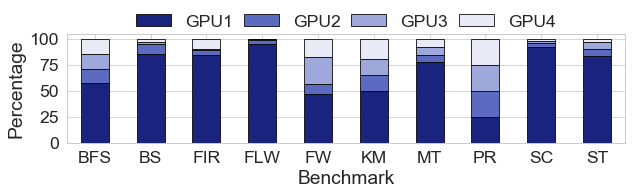

In [31]:
fig, ax = plt.subplots(figsize=(10, 2))
stacked_data.loc[:, ['Benchmark', 'GPU1', 'GPU2', 'GPU3', 'GPU4']].plot.bar(
    stacked=True, x='Benchmark',
    color=['#1A237E', '#5C6BC0', '#9FA8DA', '#E8EAF6'], ec='k',
    ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=4)
ax.set_xticklabels(stacked_data['Benchmark'], rotation=0)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel('Percentage')

plt.savefig('occupancy.pdf', bbox_inches='tight')
plt.show()
plt.close()